### **Multiple Linear Regression model project description**

We are given a dataset of the individual taxi trips within a city with various features and the target variable which is the fare amount. We want to build a Multiple Linear Regression model to predict the fare amount. We will divide the dataset into Train-Test subsets. We will train the model on Train dataset. We will check the model performance on the Test dataset and review its performace. We will also review the relative importance of the features in the model.

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)

**Import the dataset and review its contents**

In [3]:
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

In [4]:
df = df0.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Check if there are missing values and duplicates**

In [7]:
print('Duplicated values:', df.isna().sum().sum())
df.duplicated().sum()
print('Missing values per column:')
df.isna().sum()

Duplicated values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

**Convert the column containing the date and time for the trip to the "datetime" format** 

In [8]:
df['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [9]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

**Find the trip duration**

In [10]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


**Plot various distributions in the data to observe outliers**

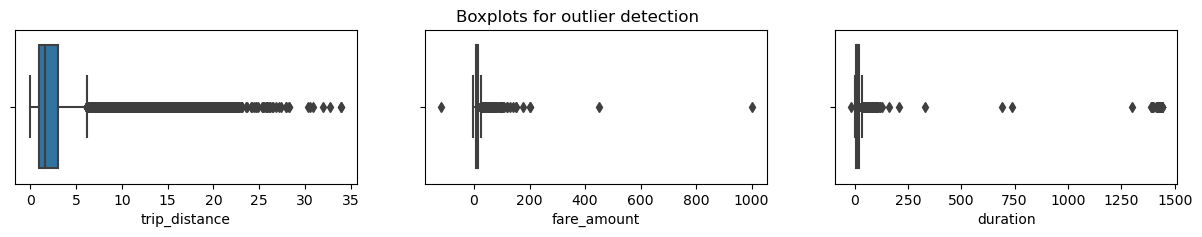

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

**`fare_amount` and `duration` features have negative values, so we put these values to 0**

In [12]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [13]:
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0

In [14]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [15]:
df.loc[df['duration'] < 0, 'duration'] = 0

**`fare_amount` and `duration` features have outliers, so we impute them to 75th percentile+6*IQR**

In [16]:
percentile25 = df['fare_amount'].quantile(0.25)
percentile75 = df['fare_amount'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 6 * iqr

df.loc[df['fare_amount'] > upper_limit, 'fare_amount'] = upper_limit

In [17]:
df['fare_amount'].describe()

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

In [18]:
percentile25 = df['duration'].quantile(0.25)
percentile75 = df['duration'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 6 * iqr

df.loc[df['duration'] > upper_limit, 'duration'] = upper_limit

In [19]:
df['duration'].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

**A trip from location A to B can have different values of `trip_distance` and `duration`. So it makes more sense to create new features `mean_distance` and `mean_duration` denoting the average values of `trip_distance` and `duration` for each of the trips from A to B.**

In [20]:
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)

grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]

grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['trip_distance']

df['mean_distance'] = df['pickup_dropoff']
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

In [21]:
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [22]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

In [23]:
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


**Trips during Rush hour would have an effect on the target variable `fare_amount`. So we create a new feature `rush_hour`.**

In [24]:
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [25]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [26]:
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,0


**Scatterplot of `mean_duration` vs `fare_amount` with a best fit line.**

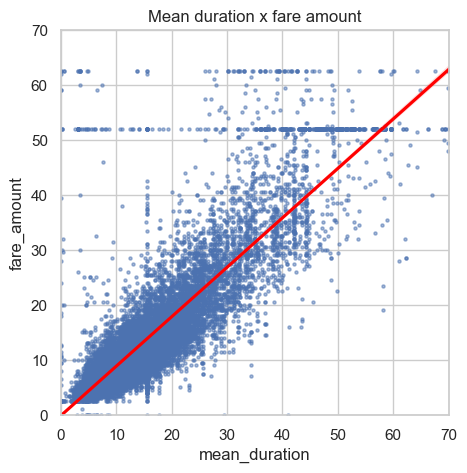

In [27]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

**There are 514 entries with `fare_amount`= 52$. From the description of dataset, we understand that these entries correspond to flat rate applied for trips to/from the airport. Since we do not need to model these trips, we can remove them from the dataset.**

In [28]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [29]:
df[df['fare_amount']==52].head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,0


In [30]:
df_f = df[df['RatecodeID'] != 2]
print(df.shape)
print(df_f.shape)

(22699, 24)
(22186, 24)


**Remove the unnecessary features from the data.**

In [31]:
df2 = df_f.copy()
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22186 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22186 non-null  int64  
 1   passenger_count  22186 non-null  int64  
 2   fare_amount      22186 non-null  float64
 3   mean_distance    22186 non-null  float64
 4   mean_duration    22186 non-null  float64
 5   rush_hour        22186 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


**Pair plot to observe distributions and correlations. Find the pearson correlation coefficients and visualize using heatmap.** 

C:\Users\dande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


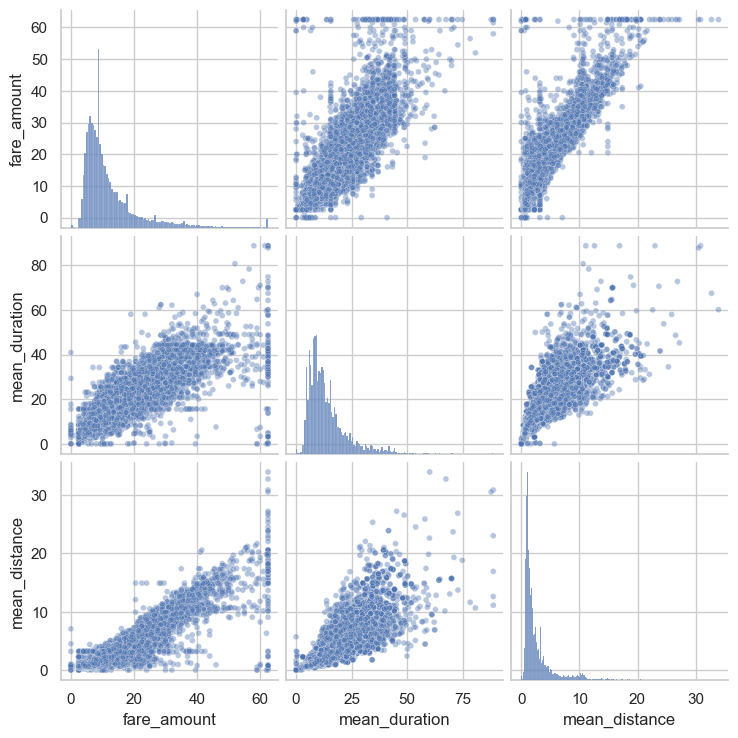

In [32]:
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']], plot_kws={'alpha':0.4, 'size':5},);

In [33]:
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.267588,-0.003935,0.000615,-0.002209,-0.002814
passenger_count,0.267588,1.000000,0.013443,0.012436,0.014262,-0.023046
fare_amount,-0.003935,0.013443,1.000000,0.904079,0.847988,-0.027184
mean_distance,0.000615,0.012436,0.904079,1.000000,0.847113,-0.055347
mean_duration,-0.002209,0.014262,0.847988,0.847113,1.000000,-0.030633
rush_hour,-0.002814,-0.023046,-0.027184,-0.055347,-0.030633,1.000000


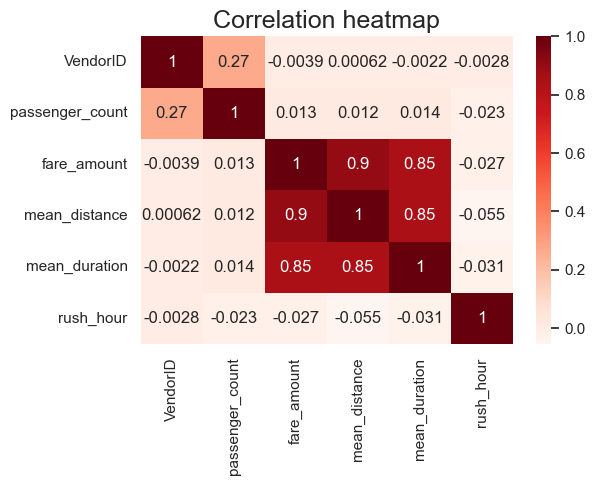

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',fontsize=18)
plt.show()

**Seperate features and target variables for modelling. Encode the categorical variable `VendorID`**

In [35]:
X = df2.drop(columns=['fare_amount'])
y = df2[['fare_amount']]
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [36]:
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


**Divide the dataset into train (80%) and test (20%). Fit the Multiple Linear Regression model. Find the performance on the training set and then on the test set.**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
r_sq = lr.score(X_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.843104261246968
R^2: 0.843104261246968
MAE: 1.9937191535643566
MSE: 12.29304800531468
RMSE: 3.506144321803465


In [40]:
r_sq_test = lr.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8350143241819232
R^2: 0.8350143241819232
MAE: 1.9867143303498291
MSE: 12.226850178462781
RMSE: 3.4966913187272883


**Sample of comparison between actual and predicted values.**

In [41]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
18484,10.0,9.945645,0.054355
10872,4.0,5.076813,-1.076813
15776,13.5,7.404386,6.095614
13639,9.5,9.669507,-0.169507
18446,12.5,6.555901,5.944099


**Scatterplot of actual values vs predicted values**

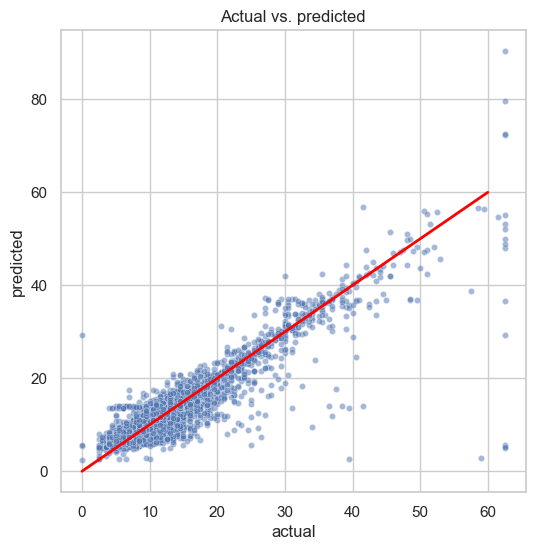

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted', data=results, s=20, alpha=0.5, ax=ax)

plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

**Check the properties of residuals to see if the required assumptions are satisfied.**

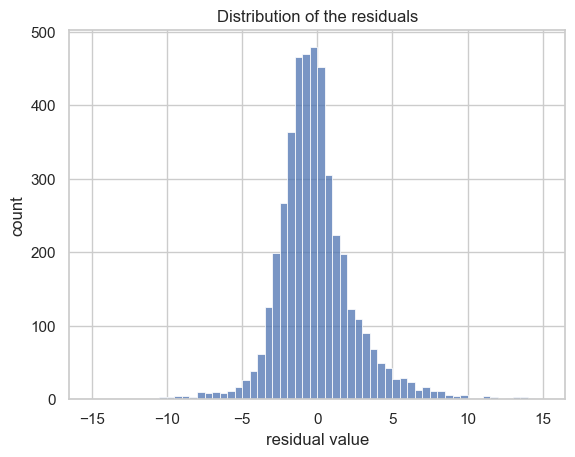

In [43]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [44]:
results['residual'].mean()

-0.009315218477922153

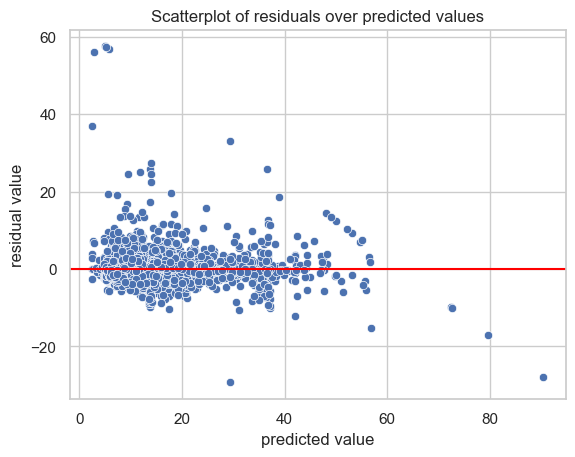

In [45]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

**Model coefficients describing relative importance of features.**

In [46]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.028244,2.100369,0.283416,0.33123,-0.061757


**Conclusion:** We constructed a Multiple Linear Regression model for predicting the fare amount from the given input data. The model seems to have a satisfactory performance. Importance of relevant features is described by coefficients of the model. 